# Corpus version 1, data exploration

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data exploration and extraction for the set of EHR .txt files present in the "inputfolder"

def analysis(inputfolder):
    # get list of filenames in folder
    filenames = os.listdir(folder)
    
    # create counter for priority one patients
    larm_count = 0
    
    # write headings to csv output file            
    outputfile = folder + 'analysis.csv'
    with open(outputfile, 'a') as f:
        f.write('filename'+';'+'number_of_characters'+';'+'priority status'+';'+'diagnosis'+';'+'sex'+';'+'age'+'\n')
    
    #iterate over EHR files to extract statistics    
    for file in filenames:
        if file != 'Readme.md':
            
            # open file and read file content
            path = folder + file
            doc = open(path, "r", encoding='utf-8') 
            data = doc.read()
            
            
            # count characters in file
            number_of_characters = len(data)-47 #get the character count; 47 characters from the validation status line subtracted
            
            
            # extract gender information
            pattern = '(?<=kon:\s)[A-Za-z]+'
            sex = re.findall(pattern, data)
            sex = str(sex)
            sex = sex.replace('[', '')
            sex = sex.replace(']', '')
            sex = sex.replace('\n', '')
            sex = sex.replace('\'', '')
            
            
            # extract age
            pattern = '(?<=alder:\s)[\d]+'
            age = re.findall(pattern, data)
            age = str(age)
            age = age.replace('[', '')
            age = age.replace(']', '')
            age = age.replace('\n', '')
            age = age.replace('\'', '')
            
            
            # extract "larm" status                    
            if 'larm: ja' in data:
                larm = 'larm: ja'
                larm_count = larm_count + 1
            
            else:
                larm = 'larm: nej'
                
         
            # extract main diagnosis
            pattern = '(?<=huvuddiagnos_001:\s)[\d\wåäöÅÄÖ .,]+'
            diagnosis = re.findall(pattern, data)
            diagnosis = str(diagnosis)
            diagnosis = diagnosis.replace('[', '')
            diagnosis = diagnosis.replace(']', '')
            diagnosis = diagnosis.replace('\n', '')
            diagnosis = diagnosis.replace('\'', '')
            
            
            doc.close()
            
            
            # write extracted information to csv output file            
            outputfile = folder + 'analysis.csv'
            with open(outputfile, 'a') as f:
                f.write(file + ';' + str(number_of_characters) + ';' + larm + ';' + diagnosis + ';' + sex + ';' + age +'\n')
            
                
    print("EHRs with priority one patients: "+ str(larm_count))

In [3]:
folder = 'C:\\Users\\sonja\\Documents\\REPOS\\openchart-se-main\\data\\charts\\'
analysis(folder)

EHRs with priority one patients: 6


In [4]:
# Load extracted information into dataframe for further exploration
df = pd.read_csv('C:\\Users\\sonja\\Documents\\REPOS\\openchart-se-main\\data\\charts\\analysis.csv', encoding='latin', sep = ';')
df.head(50)

,filename,number_of_characters,priority status,diagnosis,sex,age
0,10.txt,1276,larm: nej,R002 Hjärtklappning,K,31
1,11.txt,1406,larm: nej,R51.9 Huvudvärk,K,23
2,12.txt,1235,larm: nej,G459 TIA,K,57
3,13.txt,1570,larm: nej,S060,M,81
4,14.txt,1791,larm: nej,R060 Dyspné,M,59
5,15.txt,1333,larm: nej,N20.1 Uretärsten,M,29
6,16.txt,1446,larm: nej,"K92.2 Gastrointestinal blödning, ospecificerad",M,81
7,17.txt,1424,larm: nej,"S02.4 Fraktur Överkäkens ben W1999 Fall, ospec",M,25
8,18.txt,1054,larm: nej,A41.9 Sepsis,M,77
9,19.txt,1379,larm: nej,Dyspne,M,68


In [5]:
# get statistics for number of characters
# if max count >3000 the upper limit for the x-axis in the character count histogram needs to be adjusted
df['number_of_characters'].describe()

count      50.000000
mean     1487.960000
std       339.082373
min       954.000000
25%      1285.250000
50%      1429.000000
75%      1570.000000
max      2738.000000
Name: number_of_characters, dtype: float64

In [6]:
# get statistics for sex
df['sex'].describe()

count     50
unique     2
top        K
freq      29
Name: sex, dtype: object

In [7]:
# get statistics for age
# if max age >100 the upper limit for the x-axis in the age histogram needs to be adjusted
df['age'].describe()

count    50.000000
mean     52.060000
std      23.845943
min      18.000000
25%      29.000000
50%      54.000000
75%      77.000000
max      94.000000
Name: age, dtype: float64

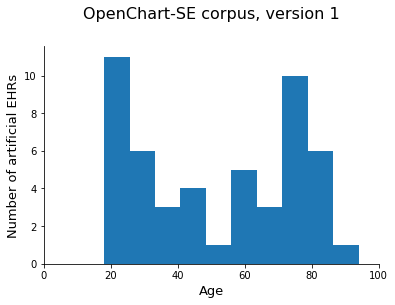

In [8]:
# Visualize distribution of variable "age" in dataset

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_subplot(111)

# Remove right and top lines around plot
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)

# Create the histogram
ax.hist(df['age'])

# Add axis labels and header
plt.xlabel('Age', fontdict = {'fontsize': 13})
plt.ylabel('Number of artificial EHRs', fontdict = {'fontsize': 13})
plt.title('OpenChart-SE corpus, version 1', fontdict = {'fontsize': 16}, y=1.1)

# Define x-axis range
plt.xlim([0, 100]) #upper limit needs to be adjusted if patients over 100 years were in the dataset

# Save and show plot
plt.savefig('C:\\Users\\sonja\\Documents\\REPOS\\openchart-se-main\\data\\charts\\agedistribution.jpg', dpi = 300, bbox_inches='tight')
plt.show()
plt.close()

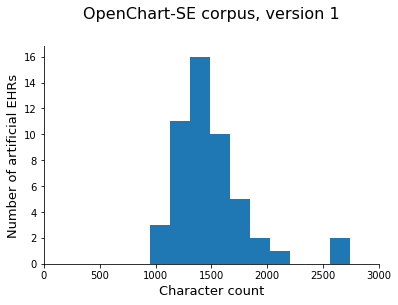

In [9]:
# Visualize distribution of character count in dataset

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_subplot(111)

# remove right and top lines around plot
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)

# Create the histogram
ax.hist(df['number_of_characters'])

# add axis labels and header
plt.xlabel('Character count', fontdict = {'fontsize': 13})
plt.ylabel('Number of artificial EHRs', fontdict = {'fontsize': 13})
plt.title('OpenChart-SE corpus, version 1', fontdict = {'fontsize': 16}, y=1.1)

# define x-axis range
plt.xlim([0, 3000])  #upper limit needs to be adjusted if character counts >3000 were in the dataset

plt.savefig('C:\\Users\\sonja\\Documents\\REPOS\\openchart-se-main\\data\\charts\\countdistribution.jpg', dpi = 300, bbox_inches='tight')

plt.show()
plt.close()